# Фильмы с данными из википедии

https://www.kaggle.com/jrobischon/wikipedia-movie-plots

1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам
2. Подготовьте sentiment analysis по отзывам (используя  nltk.classify) и оцените, как распределяется sentiment по актерам, режиссерам и жанрам

In [471]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from scipy import stats
%matplotlib inline

In [473]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')

## 1.  Анализ исходных данных (датасет "Фильмы" с данными из википедии)

In [474]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [476]:
df['Genre'].describe()

count       34886
unique       2265
top       unknown
freq         6083
Name: Genre, dtype: object

In [477]:
f"Кол-во NaN: {df['Genre'].isna().sum()}"

'Кол-во NaN: 0'

In [478]:
# Определим TOP-20 жанров (75% от всей выборки)
df['g_cnt'] = df['Genre']
top_ganres = df.groupby(['Genre'])['g_cnt'].count().sort_values(ascending=False).head(21)
top_ganres

Genre
unknown            6083
drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
war                 273
animation           264
comedy, drama       236
sci-fi              221
family              217
Name: g_cnt, dtype: int64

In [479]:
f"Доля top_ganres: {top_ganres.sum()/df['Genre'].count():2.2f}"
f"Доля unknown: {top_ganres['unknown']/df['Genre'].count():2.2f}"

'Доля top_ganres: 0.75'

'Доля unknown: 0.17'

<AxesSubplot:ylabel='Genre'>

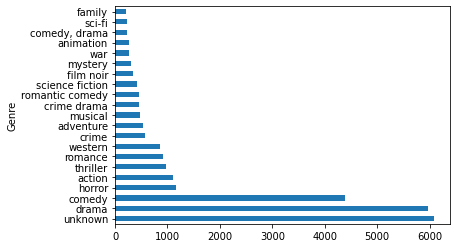

In [480]:
# Построим гистограмму популярных жанров
top_ganres.plot.barh()

##### Видим, что в TOP-5 популярных жанров входят 'Drama', 'Comedy', 'Horror' ,'Action', 'Thriller'. При этом значительное количество записей 'Unknown' (17% от всей выборки). Попробуем обучить модель по полю 'Plot' для предсказания жанра.

### Поле "Director" (Режиссер)

In [481]:
df['Director'].describe()

count       34886
unique      12593
top       Unknown
freq         1124
Name: Director, dtype: object

In [482]:
df['d_cnt'] = df['Director']
top_dir = df.groupby(['Director'])['d_cnt'].count().sort_values(ascending=True).tail(10)
top_dir

Director
Richard Thorpe         55
Norman Taurog          56
William A. Seiter      56
Allan Dwan             58
John Ford              59
Jules White            63
Lloyd Bacon            66
Hanna-Barbera          77
Michael Curtiz         79
Unknown              1124
Name: d_cnt, dtype: int64

<AxesSubplot:ylabel='Director'>

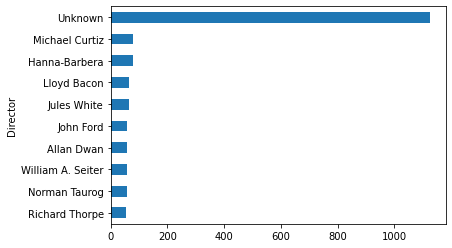

In [483]:
top_dir.plot.barh()

In [484]:
f"Доля top_directors: {top_dir.sum()/df['Director'].count():2.2f}"
f"Доля unknown: {top_dir['Unknown']/df['Director'].count():2.2f}"

'Доля top_directors: 0.05'

'Доля unknown: 0.03'

### Поле "Origin/Ethnicity" (Нац.принадлежность)

In [485]:
df['Origin/Ethnicity'].describe()

count        34886
unique          24
top       American
freq         17377
Name: Origin/Ethnicity, dtype: object

In [486]:
df['d_cnt'] = df['Origin/Ethnicity']
ethnic = df.groupby(['Origin/Ethnicity'])['d_cnt'].count().sort_values(ascending=True)
ethnic

Origin/Ethnicity
Maldivian           2
Assamese            9
Egyptian           67
Turkish            70
Malaysian          70
Punjabi            84
Bangladeshi        87
Filipino          128
Marathi           141
Russian           232
Bengali           306
Kannada           444
Chinese           463
South_Korean      522
Australian        576
Canadian          723
Hong Kong         791
Malayalam        1095
Japanese         1188
Telugu           1311
Tamil            2599
Bollywood        2931
British          3670
American        17377
Name: d_cnt, dtype: int64

<AxesSubplot:ylabel='Origin/Ethnicity'>

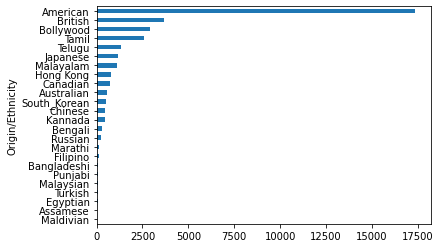

In [487]:
ethnic.plot.barh()

In [488]:
f"Доля American: {ethnic['American']/df['Origin/Ethnicity'].count():2.2f}"

'Доля American: 0.50'

Видим, что половина всех фильмов из нашей выборки создана в USA.

### Поле "Release Year" (Год релиза)

In [489]:
df['Release Year'].astype(str).describe()

count     34886
unique      117
top        2013
freq       1021
Name: Release Year, dtype: object

In [490]:
df['d_cnt'] = df['Release Year']
top_years = df.groupby(['Release Year'])['d_cnt'].count().sort_values(ascending=True).tail(20)
all_years = df.groupby(['Release Year'])['d_cnt'].count().sort_index(ascending=True)
top_years

Release Year
1994     471
1996     475
1995     488
2002     492
1997     494
2003     514
2004     565
2005     575
2008     650
2015     661
2007     665
2016     721
2006     723
2009     745
2017     805
2010     825
2011     858
2012     874
2014     929
2013    1021
Name: d_cnt, dtype: int64

<AxesSubplot:xlabel='Release Year'>

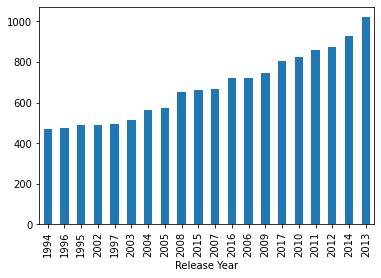

In [491]:
top_years.plot.bar()

In [492]:
f"Доля top_20_years: {top_years.sum()/all_years.sum():2.2f}"

'Доля top_20_years: 0.39'

<AxesSubplot:xlabel='Release Year'>

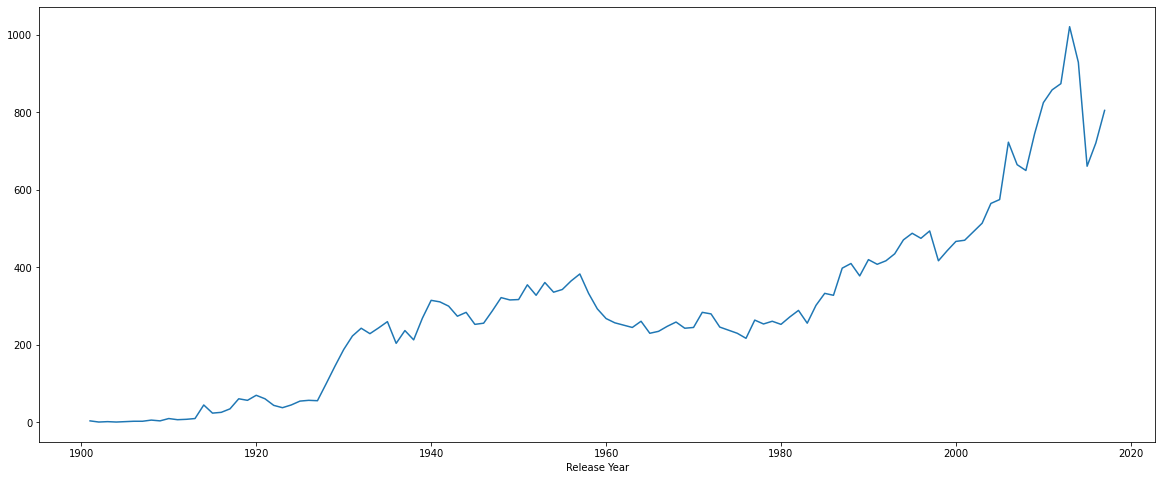

In [493]:
# Построим линейный график выпускаемых фильмов по годам
all_years.plot(figsize=(20,8))

## 2. Предсказание жанра фильма на основе его описания

### Предобработка данных

In [494]:
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annavelikobratova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annavelikobratova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [496]:
### Функция предобработки данных
p_stemmer = PorterStemmer()

def nltk_process(text):
    #Tokenization
    nltk_tokenList = word_tokenize(text)
    
    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_lemmaList = []
    for word in nltk_tokenList:
        nltk_lemmaList.append(wordnet_lemmatizer.lemmatize(word.lower()))
    
    #Filter stopword
    filtered_sentence = []  
    nltk_stop_words = set(stopwords.words("english"))
    nltk_stop_words.add("'s")
    nltk_stop_words.add("br")
    #nltk_stop_words.add("<br")
    
    for w in nltk_lemmaList:
        if w not in nltk_stop_words:  
            filtered_sentence.append(w)
    
    #Removing Punctuation
    punctuations="?:!,;[]/<>``''()*...."
    new_snts = filtered_sentence.copy()
    for word in filtered_sentence:
        if word in punctuations:
            new_snts.remove(word)
    filtered_sentence = new_snts
            
    #Remove numbers
    pattern = '[0-9\[\]]*'
    try:
        _str = re.sub(pattern, '', " ".join(filtered_sentence))
    except Exception as e:
        print(e)
    
    return _str

In [497]:
# Обработаем данные
import os.path

if not os.path.exists('data/text_clean_normal.pkl'):
    df['text_clean_normal'] = df['Plot'].apply(nltk_process) 
    with open('data/text_clean_normal.pkl', 'wb') as f:
        pickle.dump(df['text_clean_normal'],f)

with open('data/text_clean_normal.pkl', 'rb') as f:
    df['text_clean_normal'] = pickle.load(f)

df['text_clean_normal'].head(5)

0    bartender working saloon serving drink custome...
1    moon painted smiling face hang park night youn...
2    film minute long composed two shot first girl ...
3    lasting  second consisting two shot first shot...
4    earliest known adaptation classic fairytale fi...
Name: text_clean_normal, dtype: object

In [498]:
train_test_data = df[df['Genre'] != 'unknown'].copy()
to_predict = df[df['Genre'] == 'unknown'].copy()

In [499]:
top_genres = ['family', 'sci-fi', 'comedy, drama', 
              'animation', 'war', 'mystery', 'film noir',
              'science fiction', 'romantic comedy', 'crime drama', 
              'musical', 'adventure', 'crime', 'western', 'romance',
              'thriller', 'action', 'horror', 'comedy', 'drama']
train_test_data = train_test_data[train_test_data['Genre'].apply(lambda x: x in top_ganres)].copy()

### Обьединим похожие жанры: 
1. "sci-fi" в "science fiction";
2. "film noir" в "horror";
3. "romance" в "romantic comedy"
4. "crime drama" в "crime"
5. "comedy, drama" в "comedy"

<AxesSubplot:ylabel='Genre'>

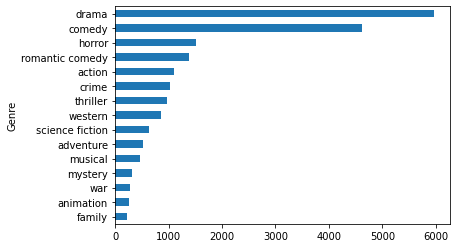

In [500]:
train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "science fiction" if x == "sci-fi" else x)
train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "horror" if x == "film noir" else x)
train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "romantic comedy" if x == "romance" else x)
train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "crime" if x == "crime drama" else x)
train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "comedy" if x == "comedy, drama" else x)
train_test_data.groupby(['Genre'])['g_cnt'].count().sort_values(ascending=True).plot.barh()

### Обучим модель предсказывающую жанр по `Plot`

In [501]:
def metrics(_test, _pred):
    cm = confusion_matrix(_test, _pred)
    plt.figure(figsize=(11, 4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    print(classification_report(_test, _pred))

In [502]:
X_train, X_test, y_train, y_test = train_test_split(train_test_data['text_clean_normal'], train_test_data['Genre'], test_size=0.25, stratify=train_test_data['Genre'])

v = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=15000)

X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)

#### Naives Bayes Classifier

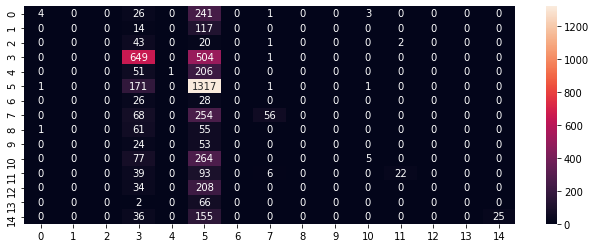

                 precision    recall  f1-score   support

         action       0.67      0.01      0.03       275
      adventure       0.00      0.00      0.00       131
      animation       0.00      0.00      0.00        66
         comedy       0.49      0.56      0.52      1154
          crime       1.00      0.00      0.01       258
          drama       0.37      0.88      0.52      1491
         family       0.00      0.00      0.00        54
         horror       0.85      0.15      0.25       378
        musical       0.00      0.00      0.00       117
        mystery       0.00      0.00      0.00        77
romantic comedy       0.56      0.01      0.03       346
science fiction       0.92      0.14      0.24       160
       thriller       0.00      0.00      0.00       242
            war       0.00      0.00      0.00        68
        western       1.00      0.12      0.21       216

       accuracy                           0.41      5033
      macro avg       0.39   

/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [503]:
clf = MultinomialNB()
res = clf.fit(X_train_v, y_train)
pred = clf.predict(X_test_v)
metrics(y_test, pred)

#### Decision Tree Classifier

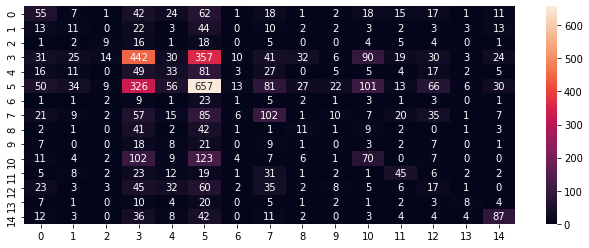

                 precision    recall  f1-score   support

         action       0.22      0.20      0.21       275
      adventure       0.09      0.08      0.09       131
      animation       0.20      0.14      0.16        66
         comedy       0.36      0.38      0.37      1154
          crime       0.14      0.13      0.13       258
          drama       0.40      0.44      0.42      1491
         family       0.02      0.02      0.02        54
         horror       0.26      0.27      0.27       378
        musical       0.12      0.09      0.11       117
        mystery       0.00      0.00      0.00        77
romantic comedy       0.22      0.20      0.21       346
science fiction       0.32      0.28      0.30       160
       thriller       0.08      0.07      0.07       242
            war       0.25      0.12      0.16        68
        western       0.46      0.40      0.43       216

       accuracy                           0.31      5033
      macro avg       0.21   

In [504]:
clf = tree.DecisionTreeClassifier(max_depth=140)
res = clf.fit(X_train_v, y_train)
pred = clf.predict(X_test_v)
metrics(y_test, pred)

#### Logistic Regression Classifier

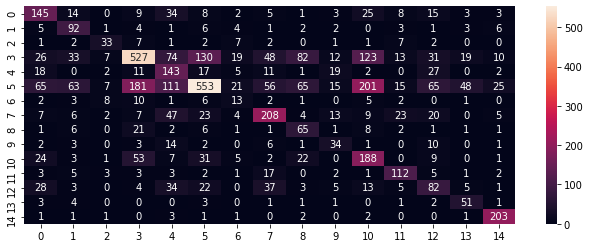

                 precision    recall  f1-score   support

         action       0.44      0.53      0.48       275
      adventure       0.39      0.70      0.50       131
      animation       0.51      0.50      0.50        66
         comedy       0.63      0.46      0.53      1154
          crime       0.30      0.55      0.39       258
          drama       0.68      0.37      0.48      1491
         family       0.16      0.24      0.19        54
         horror       0.52      0.55      0.54       378
        musical       0.26      0.56      0.35       117
        mystery       0.31      0.44      0.37        77
romantic comedy       0.32      0.54      0.41       346
science fiction       0.59      0.70      0.64       160
       thriller       0.30      0.34      0.32       242
            war       0.38      0.75      0.51        68
        western       0.78      0.94      0.85       216

       accuracy                           0.49      5033
      macro avg       0.44   

In [505]:
# LogisticRegression
clf = LogisticRegression(penalty='l2', class_weight= 'balanced')
res = clf.fit(X_train_v, y_train)

pred = clf.predict(X_test_v)
metrics(y_test, pred)

Применяя разные модели обучение модель получается не достаточно точной. Проведем анализ причин.

Из-за того, что в тренировочной выборке сильный перекос в количестве примеров для классов "comedy" и "drama" видно, что модель на них переобучилась и пытается присваивать эти жанры почти ко всем фильмам (примерно к 76% фильмов). Cделаем более сбалансированную по жанрам выборку.

In [506]:
# случайно отберем фильмы каждого жанра в объеме не превышающем минимальное кол-во сэмплов для жанра.

shaffle_ttd = train_test_data.sample(frac=1)

min_cnt = shaffle_ttd['Genre'].value_counts().min()
genres = shaffle_ttd['Genre'].unique()
ttd = shaffle_ttd.copy()
ttd.drop(ttd.index, inplace=True)

for genre in genres:
    ttd = ttd.append(shaffle_ttd[shaffle_ttd['Genre'] == genre][0:min_cnt])

ttd['Genre'].value_counts()

science fiction    217
comedy             217
horror             217
thriller           217
crime              217
animation          217
family             217
war                217
western            217
romantic comedy    217
adventure          217
musical            217
action             217
mystery            217
drama              217
Name: Genre, dtype: int64

In [507]:
X_train, X_test, y_train, y_test = train_test_split(ttd['text_clean_normal'], ttd['Genre'], test_size=0.15, stratify=ttd['Genre'])

v = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=15000)

X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)


#### LogisticRegression

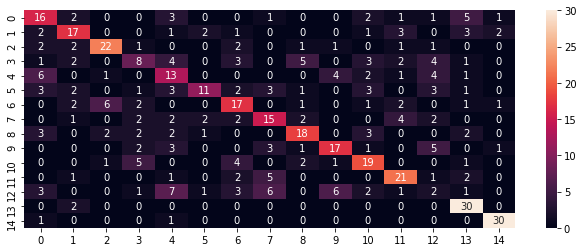

                 precision    recall  f1-score   support

         action       0.43      0.50      0.46        32
      adventure       0.55      0.53      0.54        32
      animation       0.69      0.67      0.68        33
         comedy       0.33      0.24      0.28        33
          crime       0.33      0.41      0.36        32
          drama       0.65      0.33      0.44        33
         family       0.47      0.52      0.49        33
         horror       0.45      0.47      0.46        32
        musical       0.58      0.55      0.56        33
        mystery       0.59      0.52      0.55        33
romantic comedy       0.51      0.58      0.54        33
science fiction       0.58      0.64      0.61        33
       thriller       0.09      0.06      0.07        33
            war       0.62      0.94      0.75        32
        western       0.86      0.94      0.90        32

       accuracy                           0.52       489
      macro avg       0.52   

In [508]:
clf = LogisticRegression(penalty='l2', class_weight= 'balanced')
res = clf.fit(X_train_v, y_train)

pred = clf.predict(X_test_v)
metrics(y_test, pred)

Видим на heatmap, что LR-классификатор повысил точность прогноза, но точность все еще не высокая. Есть предположение, что выборка мала и для более точного предсказания нужно увеличить размер обучающей выборки.
Проверим эту гипотезу следующим образом, у нас есть 6 жанров, количество примеров по которым более 1000 (в 5 и более раз больше чем использованая текущая выборка).

In [509]:
top_genres_1000 = list(train_test_data['Genre'].value_counts()[train_test_data['Genre'].value_counts() > 1000].index)
top_genres_1000

['drama', 'comedy', 'horror', 'romantic comedy', 'action', 'crime']

In [510]:
train_test_data = train_test_data[train_test_data['Genre'].apply(lambda x: x in top_genres_1000)].copy()

#Перемешаем 
shaffle_ttd = train_test_data.sample(frac=1)

min_cnt = shaffle_ttd['Genre'].value_counts().min()
genres = shaffle_ttd['Genre'].unique()
ttd = shaffle_ttd.copy()
ttd.drop(ttd.index, inplace=True)

for genre in genres:
    ttd = ttd.append(shaffle_ttd[shaffle_ttd['Genre'] == genre][0:min_cnt])

ttd['Genre'].value_counts()

comedy             1032
crime              1032
romantic comedy    1032
drama              1032
horror             1032
action             1032
Name: Genre, dtype: int64

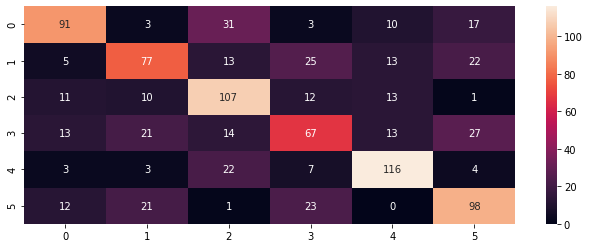

                 precision    recall  f1-score   support

         action       0.67      0.59      0.63       155
         comedy       0.57      0.50      0.53       155
          crime       0.57      0.69      0.63       154
          drama       0.49      0.43      0.46       155
         horror       0.70      0.75      0.72       155
romantic comedy       0.58      0.63      0.60       155

       accuracy                           0.60       929
      macro avg       0.60      0.60      0.60       929
   weighted avg       0.60      0.60      0.60       929



In [511]:
X_train, X_test, y_train, y_test = train_test_split(ttd['text_clean_normal'], ttd['Genre'], test_size=0.15, stratify=ttd['Genre'])

v = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=15000)

X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)

# LogisticRegression
clf = LogisticRegression(penalty='l2')
res = clf.fit(X_train_v, y_train)

pred = clf.predict(X_test_v)

metrics(y_test, pred)



#### Gradient Boosting

In [512]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=20, text_features=['t1', 't2'])
x= pd.DataFrame({'t1':X_train, 't2':X_train})
x_test = pd.DataFrame({'t1':X_test, 't2':X_test})
model.fit(x, y=y_train)
predictions = model.predict(x_test)

Learning rate set to 0.5
0:	learn: 1.4589860	total: 1.01s	remaining: 19.2s
1:	learn: 1.3757815	total: 1.76s	remaining: 15.9s
2:	learn: 1.3078102	total: 2.49s	remaining: 14.1s
3:	learn: 1.2752245	total: 3.19s	remaining: 12.8s
4:	learn: 1.2434143	total: 3.9s	remaining: 11.7s
5:	learn: 1.2277768	total: 4.59s	remaining: 10.7s
6:	learn: 1.2225393	total: 5.28s	remaining: 9.81s
7:	learn: 1.2112577	total: 5.98s	remaining: 8.97s
8:	learn: 1.2006181	total: 6.68s	remaining: 8.17s
9:	learn: 1.1863855	total: 7.41s	remaining: 7.41s
10:	learn: 1.1761560	total: 8.09s	remaining: 6.62s
11:	learn: 1.1718585	total: 8.78s	remaining: 5.85s
12:	learn: 1.1635564	total: 9.47s	remaining: 5.1s
13:	learn: 1.1565790	total: 10.2s	remaining: 4.35s
14:	learn: 1.1434678	total: 10.9s	remaining: 3.62s
15:	learn: 1.1320970	total: 11.5s	remaining: 2.88s
16:	learn: 1.1247498	total: 12.2s	remaining: 2.16s
17:	learn: 1.1152673	total: 12.9s	remaining: 1.43s
18:	learn: 1.1069908	total: 13.6s	remaining: 714ms
19:	learn: 1.10080

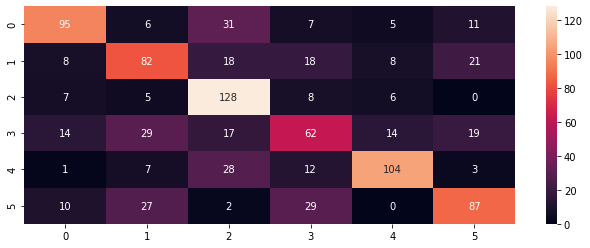

                 precision    recall  f1-score   support

         action       0.70      0.61      0.66       155
         comedy       0.53      0.53      0.53       155
          crime       0.57      0.83      0.68       154
          drama       0.46      0.40      0.43       155
         horror       0.76      0.67      0.71       155
romantic comedy       0.62      0.56      0.59       155

       accuracy                           0.60       929
      macro avg       0.61      0.60      0.60       929
   weighted avg       0.61      0.60      0.60       929



In [513]:
metrics(y_test, predictions)

Видим, что при увеличении выборки, точность повысилась примерно на 8%. При этом заметим, что классы 0, 2 и 4 предсказывается хорошо, а 1, 3 и 5 хуже. Попробуем разобраться в чем причина.

In [514]:
[res.classes_[x] for x in range(6)] 

['action', 'comedy', 'crime', 'drama', 'horror', 'romantic comedy']

Жанры с плохим качеством предсказания, это жанры к которым подмешивали жанры с похожими названиями ("comedy, drama" => "comedy") и жанр "romantic comedy" судя по названию и предсказанию имеет схожесть с жанром "comedy". Проверим гипотезу влияния на отмене подмешивания "comedy, drama" в "comedy".

In [515]:
train_test_data = df[df['Genre'] != 'unknown'].copy()
to_predict = df[df['Genre'] == 'unknown'].copy()

In [516]:
top_genres = ['family', 'sci-fi', 'comedy, drama', 
              'animation', 'war', 'mystery', 'film noir',
              'science fiction', 'romantic comedy', 'crime drama', 
              'musical', 'adventure', 'crime', 'western', 'romance',
              'thriller', 'action', 'horror', 'comedy', 'drama']
train_test_data = train_test_data[train_test_data['Genre'].apply(lambda x: x in top_ganres)].copy()

<AxesSubplot:ylabel='Genre'>

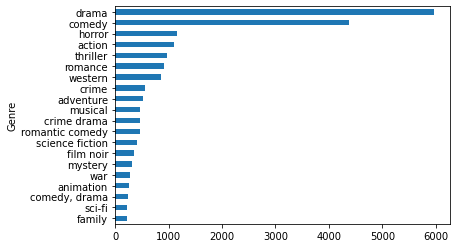

In [517]:
#train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "science fiction" if x == "sci-fi" else x)
#train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "horror" if x == "film noir" else x)
#train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "romantic comedy" if x == "romance" else x)
#train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "crime" if x == "crime drama" else x)
# train_test_data['Genre'] = train_test_data['Genre'].apply(lambda x: "comedy" if x == "comedy, drama" else x)
train_test_data.groupby(['Genre'])['g_cnt'].count().sort_values(ascending=True).plot.barh()

In [518]:
top_genres_1000 = list(train_test_data['Genre'].value_counts()[train_test_data['Genre'].value_counts() > 900].index)
top_genres_1000

['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

In [519]:
train_test_data = train_test_data[train_test_data['Genre'].apply(lambda x: x in top_genres_1000)].copy()

#Перемешаем 
shaffle_ttd = train_test_data.sample(frac=1)

min_cnt = shaffle_ttd['Genre'].value_counts().min()
genres = shaffle_ttd['Genre'].unique()
ttd = shaffle_ttd.copy()
ttd.drop(ttd.index, inplace=True)

for genre in genres:
    ttd = ttd.append(shaffle_ttd[shaffle_ttd['Genre'] == genre][0:min_cnt])

ttd['Genre'].value_counts()

romance     923
comedy      923
drama       923
horror      923
thriller    923
action      923
Name: Genre, dtype: int64

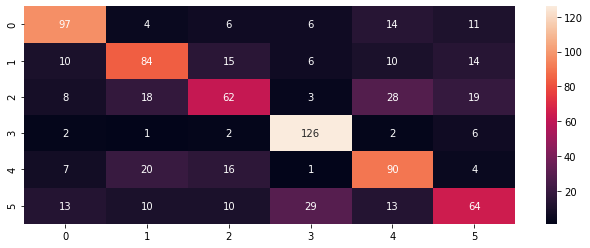

              precision    recall  f1-score   support

      action       0.71      0.70      0.71       138
      comedy       0.61      0.60      0.61       139
       drama       0.56      0.45      0.50       138
      horror       0.74      0.91      0.81       139
     romance       0.57      0.65      0.61       138
    thriller       0.54      0.46      0.50       139

    accuracy                           0.63       831
   macro avg       0.62      0.63      0.62       831
weighted avg       0.62      0.63      0.62       831



In [520]:
X_train, X_test, y_train, y_test = train_test_split(ttd['text_clean_normal'], ttd['Genre'], test_size=0.15, stratify=ttd['Genre'])

v = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=15000)

X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)

# LogisticRegression
clf_exp = LogisticRegression(penalty='l2')
res = clf_exp.fit(X_train_v, y_train)

pred = clf_exp.predict(X_test_v)

metrics(y_test, pred)

In [521]:
[res.classes_[x] for x in range(6) ]

['action', 'comedy', 'drama', 'horror', 'romance', 'thriller']

**Вывод**: _Отмена смешивания похожих классов помогла повысить качество предсказания жара comedy (recall +7%), но на общую картину сильно не повлияла, что говорит о том, что на самом деле эти жанры достаточно похожи по описаниям (`plot`). При этом точность достаточно хорошо растет при увеличении обучающей выборки._

**Глобальный вывод**: _Основываясь на иссследорваниях и тестировании  метода токенизации CountVectorizer проведенных в https://www.kaggle.com/salikhussaini49/movie-plots-analysis-prediction можно сделать вывод о том, что точность модели не улучшается. Увеличить точность можно с помощью приведения мультиклассовой классификации в бинарную (например предсказать комедия это или нет), повысить качество предсказания можно примерно до 85%._

### Предсказание для df.Genre == 'unknown'

Применим обученную модель для набора `df.Genre == 'unknown'`

In [524]:
X_pred_v = v.transform(to_predict['text_clean_normal'])
to_predict['p_genre'] = clf.predict(X_pred_v)

for lnk in to_predict[to_predict['p_genre'] == 'comedy']['Wiki Page'].head(10):
    print(lnk)

https://en.wikipedia.org/wiki/Love_by_the_Light_of_the_Moon
https://en.wikipedia.org/wiki/A_Christmas_Carol_(1910_film)
https://en.wikipedia.org/wiki/What_the_Daisy_Said
https://en.wikipedia.org/wiki/The_Land_Beyond_the_Sunset
https://en.wikipedia.org/wiki/The_New_York_Hat
https://en.wikipedia.org/wiki/Atlantis_(1913_film)
https://en.wikipedia.org/wiki/His_Majesty,_the_Scarecrow_of_Oz
https://en.wikipedia.org/wiki/My_Boy_(1921_film)
https://en.wikipedia.org/wiki/The_Midnight_Girl
https://en.wikipedia.org/wiki/Sparrows_(1926_film)


## Подготовим sentiment analysis для поля Plot

### Обучим классификатор на выборке imdb

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [541]:
df_imdb = pd.read_csv('data/IMDB Dataset.csv')
df_imdb.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [526]:
df_imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [531]:
# Предобработка review (Токенизация, лематизация, удаление стоп-слов, удаление пунктуации и цифр)

# Обработаем данные
import os.path

if not os.path.exists('data/sentiment_cleaned_txt.pkl'):
    df_imdb['text_clean_normal'] = df_imdb['review'].apply(nltk_process) 
    with open('data/sentiment_cleaned_txt.pkl', 'wb') as f:
        pickle.dump(df_imdb['text_clean_normal'],f)

with open('data/sentiment_cleaned_txt.pkl', 'rb') as f:
    df_imdb['text_clean_normal'] = pickle.load(f)

df_imdb['text_clean_normal'].head(5)

0    one reviewer ha mentioned watching  oz episode...
1    wonderful little production filming technique ...
2    thought wa wonderful way spend time hot summer...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: text_clean_normal, dtype: object

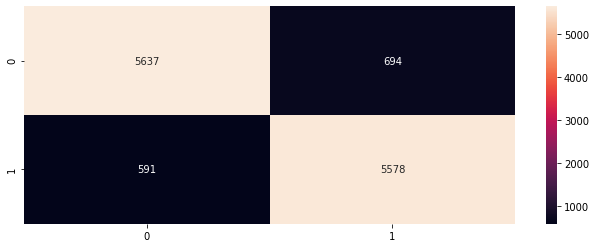

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      6331
    positive       0.89      0.90      0.90      6169

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



In [532]:
# разобъем данные на обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(df_imdb['text_clean_normal'], df_imdb['sentiment'], test_size=0.25)

# векторизуем данные
v = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=15000)
X_train_v = v.fit_transform(X_train)
X_test_v = v.transform(X_test)

# Построим классификатор с помощю Логистической регрессии
clf = LogisticRegression(penalty='l2')
res = clf.fit(X_train_v, y_train)

# Проверим качество модели
pred = clf.predict(X_test_v)
metrics(y_test, pred)

**Вывод**: _Точность LR-классификатора сентемента составила 89%._

### Применим полученный классификатор к нормализованному полю Plot

In [533]:
X = v.transform(df['text_clean_normal'])
df['sentiment'] = clf.predict(X)

In [534]:
df[['Title', 'sentiment']].head(5)

,Title,sentiment
0,Kansas Saloon Smashers,negative
1,Love by the Light of the Moon,positive
2,The Martyred Presidents,negative
3,"Terrible Teddy, the Grizzly King",negative
4,Jack and the Beanstalk,positive


### Оценим, как распределяется sentiment по актерам, режиссерам и жанрам

In [535]:
dir_sent = df[['Director', 'sentiment', 'Genre']].copy()
dir_sent = dir_sent[dir_sent['Director'] != 'Unknown'].copy()
table = pd.pivot_table(dir_sent, values='Genre', index=['Director'],
                    columns=['sentiment'], aggfunc=lambda x: len(x.unique()), fill_value=0)

table['total'] = table['positive'] +  table['negative']
table.sort_values(by='total', ascending=False).head(21)

sentiment,negative,positive,total
Director,,,
Michael Curtiz,8,26,34
Lloyd Bacon,10,21,31
Gordon Douglas,8,19,27
Mervyn LeRoy,7,20,27
Richard Fleischer,6,18,24
Phil Karlson,6,17,23
Henry Hathaway,7,16,23
Arthur Lubin,7,15,22
William Beaudine,8,14,22


**Вывод**: _Режиссеры снявщие наибольшое количество фильмов имеют описание фильма с позитивным сентиментом._

In [536]:
# Актеры
cast_sent = df[['Cast', 'sentiment']].copy()
cast_sent = cast_sent.dropna()
cast_sent = cast_sent[cast_sent['Cast'] != 'unknown'].copy()
cast_sent = cast_sent[cast_sent['Cast'] != 'Unknown'].copy()
cast_sent['Cast'] = cast_sent['Cast'].apply(lambda x: x.replace(', Jr.', ' Jr.'))
cast_sent['Cast'] = cast_sent['Cast'].apply(lambda x: x.replace('\r\n', ', '))
cast_sent['Cast_list'] = cast_sent['Cast'].apply(lambda x: re.split(r' ?, ?| ?\/ ?| ?& ?', x))
cast_sent

,Cast,sentiment,Cast_list
5,May Clark,negative,[May Clark]
13,"William Craven, Florence Lawrence",positive,"[William Craven, Florence Lawrence]"
15,"Bertha Regustus, Edward Boulden",positive,"[Bertha Regustus, Edward Boulden]"
16,"Arthur V. Johnson, Linda Arvidson",positive,"[Arthur V. Johnson, Linda Arvidson]"
17,D. W. Griffith,positive,[D. W. Griffith]
...,...,...,...
34881,"Director: Russell Crowe, Cast: Russell Crowe, ...",positive,"[Director: Russell Crowe, Cast: Russell Crowe,..."
34882,"Ahmet Kural, Murat Cemcir",positive,"[Ahmet Kural, Murat Cemcir]"
34883,"Ata Demirer, Tuvana Türkay, Ülkü Duru",positive,"[Ata Demirer, Tuvana Türkay, Ülkü Duru]"
34884,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",negative,"[YouTubers Shanna Malcolm, Shira Lazar, Sara F..."


In [537]:
_tmp = set()
for cast in cast_sent['Cast_list']:
    for actor in cast:
        _tmp.add(actor)

cast_dict = {'actor': [], 'sent': []}
for actor in _tmp:
    sents = cast_sent[cast_sent['Cast_list'].apply(lambda x: actor in x)]['sentiment'].to_list()
    cast_dict['actor'] += [actor]*len(sents)
    cast_dict['sent'] += sents
actor_sent_df = pd.DataFrame(cast_dict)

In [538]:
table = pd.pivot_table(actor_sent_df, values='sent', index=['actor'],
                       columns=['sent'], aggfunc=pd.DataFrame.count, fill_value=0)
#table
table['total'] = (table['positive'] +  table['negative'])
table['pos %'] = table['positive']/table['total']
table.sort_values(by=['pos %', 'total'], ascending=False).head(10)
table.sort_values(by=['total'], ascending=False).head(10)

sent,negative,positive,total,pos %
actor,,,,
Tyrone Power,0,40,40,1.0
Geetha,0,33,33,1.0
Chandra Mohan,0,27,27,1.0
Dhanush,0,27,27,1.0
Ian McKellen,0,27,27,1.0
Max von Sydow,0,27,27,1.0
Soumitra Chatterjee,0,26,26,1.0
Keith Carradine,0,24,24,1.0
Forrest Tucker,0,23,23,1.0


sent,negative,positive,total,pos %
actor,,,,
,62,292,354,0.824859
Mithun Chakraborty,15,139,154,0.902597
Jeetendra,15,136,151,0.900662
Sivaji Ganesan,19,112,131,0.854962
Prakash Raj,16,109,125,0.872000
Pran,19,102,121,0.842975
Dharmendra,17,100,117,0.854701
M. G. Ramachandran,22,93,115,0.808696
Amitabh Bachchan,16,95,111,0.855856


**Вывод**: _Популярные актеры (в большинстве американские, британские и индийские) снимаются в фильмах с позитивным сентиментом._

#### Распределение по жанрам

In [539]:
top_genres = ['family', 'sci-fi', 'comedy, drama', 
              'animation', 'war', 'mystery', 'film noir',
              'science fiction', 'romantic comedy', 'crime drama', 
              'musical', 'adventure', 'crime', 'western', 'romance',
              'thriller', 'action', 'horror', 'comedy', 'drama']

df_gs = df.groupby(['Genre', 'sentiment']).count()
g_cnt = df_gs.query('Genre.isin(@top_genres)')['g_cnt']

results = {}
for genre, sent in g_cnt.index:
    s_cnt = results.get(genre, [0, 0])
    if sent == 'negative':
        s_cnt[0] = g_cnt[genre, sent]
    else:
        s_cnt[1] = g_cnt[genre, sent]
    
    results[genre] = s_cnt
      

for genre, s_cnt in results.items():
    _all = sum(s_cnt)
    results[genre] = [_cnt / _all for _cnt in s_cnt]


results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1][0], reverse=True)}

(<Figure size 662.4x720 with 1 Axes>, <AxesSubplot:>)

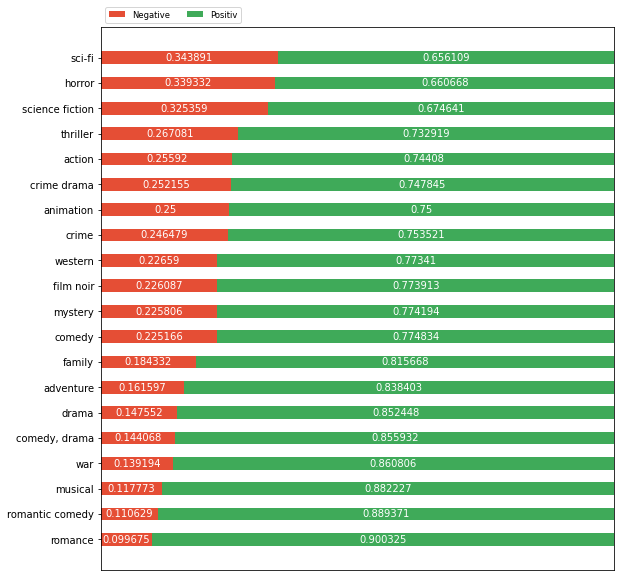

In [540]:
category_names = ['Negative', 'Positiv']
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

**Вывод**: _Исходя из выше приведенного исследования по распределению sentiment по жанрам можно сделать вывод, о том что в фильмах ужасах,  научной фантастики, триллерах негативного сентимента больше, чем в комедиях и иных развлекательных и лирических жанрах._